自分用に適当にコードを書いているため、説明が分かりにくいかもしれません。質問は
yutaka.higashis3@gmail.comもしくは、yutaka.higashis10@gmail.comまでお願い致します。

①ノートパソコンで作業しており、メモリ容量の関係から、データを使うときは毎回getdfsモジュールからデータをロードし、使用後はdel関数でメモリ消去をしています。高性能なPCで使う分にはdelしなくてもいいかもしれません。

## ライブラリ

In [3]:
import csv
import datetime as dt
import math
import os
import re
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import optimize
from matplotlib import animation
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize

#自作モジュール用フォルダにパスを通す
print(os.getcwd())
module_path = os.getcwd()[:-len('notebook')] + 'my_module'
print(module_path)
sys.path.append(module_path)

#自作モジュールと、モジュールアップデート用
#(importlib.reloadをしないとモジュールを書き換えても反映されないため)
import trendline
import dispgraphs
import importlib
import graph_settings
import getdfs
import calcdischarge

importlib.reload(trendline)
importlib.reload(dispgraphs)
importlib.reload(graph_settings)
importlib.reload(getdfs)
importlib.reload(calcdischarge)




C:\Users\user\OneDrive - Kyoto University\shared-Yutaka\Research\Hydrophone\notebook
C:\Users\user\OneDrive - Kyoto University\shared-Yutaka\Research\Hydrophone\my_module


<module 'calcdischarge' from 'C:\\Users\\user\\OneDrive - Kyoto University\\shared-Yutaka\\Research\\Hydrophone\\my_module\\calcdischarge.py'>

## グラフセッティング

In [154]:
graph_settings.setsettings()

## 初期値設定

In [5]:
print(os.getcwd())
PATH_SAVE_GRAPHS = os.getcwd()[:-len('notebook')] + 'graphs_for_seminars/' + '11.14.seminar/'
print(PATH_SAVE_GRAPHS)

C:\Users\user\OneDrive - Kyoto University\shared-Yutaka\Research\Hydrophone\notebook
C:\Users\user\OneDrive - Kyoto University\shared-Yutaka\Research\Hydrophone\graphs_for_seminars/11.14.seminar/


In [6]:
# ハイドロフォン長さ
length_hp_m = 0.275
length_C_m = 0.5
pit_width = 0.2
Dv = 0.0125
Dh = 0.0125

W_IDEAL = np.array([0.15, 0.22, 0.29, 0.65, 0.91, 1.96, 3.01, 6.91, 10.81, 50])*0.001
TARGET_TOT = ['-2mm', '3-5mm', '5-6mm', '6-7mm', '7-8.5mm', '8.5-10mm', '10-12.5mm', '12.5-15mm', '15-20mm', '25-30mm', '30mm-']


event_marker = ['.', 'x', 'v', '1', 'D']

suffix = ['_Tot(1)', '_Tot(2)', '_Tot(3)', '_Tot(4)', '_Tot(5)',
            '_Tot(6)', '_Tot(7)', '_Tot(8)', '_Tot(9)', '_Tot(10)']

# 直上中央ハイドロフォン
names_of_center = ['hp'+ s for s in suffix]
# 中央ハイドロフォン
names_of_C = ['C'+ s for s in suffix]
# 中央右ハイドロフォン
names_of_RC = ['RC'+ s for s in suffix]
# 中央左ハイドロフォン
names_of_LC = ['LC'+ s for s in suffix]
# 右ハイドロフォン
names_of_R = ['R'+ s for s in suffix]
# 左ハイドロフォン
names_of_L = ['L'+ s for s in suffix]

# 右鉛直ハイドロフォン
names_of_VR = ['VR'+ s for s in suffix]
# 左鉛直ハイドロフォン
names_of_VL = ['VL'+ s for s in suffix]


# Corrected直上中央ハイドロフォン
names_of_center_Corrected = ['Corrected_hp'+ s for s in suffix]
# Corrected中央ハイドロフォン
names_of_C_Corrected = ['Corrected_C'+ s for s in suffix]
# Corrected中央右ハイドロフォン
names_of_RC_Corrected = ['Corrected_RC'+ s for s in suffix]
# Corrected中央左ハイドロフォン
names_of_LC_Corrected = ['Corrected_LC'+ s for s in suffix]
# Corrected右ハイドロフォン
names_of_R_Corrected = ['Corrected_R'+ s for s in suffix]
# Corrected左ハイドロフォン
names_of_L_Corrected = ['Corrected_L'+ s for s in suffix]



# スロットナンバーと倍率を対応させる
amplification_factor = {'Tot(1)': '1024', 'Tot(2)': '512', 'Tot(3)': '256', 'Tot(4)': '128',
                        'Tot(5)': '64', 'Tot(6)': '32', 'Tot(7)': '16', 'Tot(8)': '8',
                        'Tot(9)': '4', 'Tot(10)': '2'}

# データインポート

In [7]:
just_once_count = 0

In [8]:
#使うcolumns
if just_once_count == 0:
    cols_use = names_of_center + ['Load_Avg', 'Load_Avg_difference']
    just_once_count += 1
    
    print('COL_USE :' +  str(cols_use))
    
    df2017 = getdfs.get2017method2cleanedmean_pit_true()
    df2017 = df2017[cols_use]
    
    list_df2018_3events = getdfs.get2018_3events_method2_mean()
    for i, df2018_each in enumerate(list_df2018_3events):
        list_df2018_3events[i] = df2018_each[cols_use]
    
    df_all = pd.DataFrame()
    df_all = df_all.append(df2017)
    del df2017

    for i, df2018_each in enumerate(list_df2018_3events):
        df_all = df_all.append(df2018_each)
        
    del list_df2018_3events
    
    

    
else:
    print('COL_USE :' +  str(cols_use))
    print('Passed')

COL_USE :['hp_Tot(1)', 'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)', 'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)', 'Load_Avg', 'Load_Avg_difference']


In [9]:
df_all

,hp_Tot(1),hp_Tot(2),hp_Tot(3),hp_Tot(4),hp_Tot(5),hp_Tot(6),hp_Tot(7),hp_Tot(8),hp_Tot(9),hp_Tot(10),Load_Avg,Load_Avg_difference
TIMESTAMP,,,,,,,,,,,,
2016-06-25 02:00:00,425.939394,509.696970,412.727273,280.242424,155.878788,53.939394,17.090909,8.969697,8.484848,8.363636,205.4,3.000000
2016-06-25 02:30:00,353.575758,538.060606,515.878788,395.151515,248.848485,103.030303,45.939394,26.303030,18.424242,10.909091,224.6,5.566667
2016-06-25 03:00:00,339.393939,475.393939,469.454545,347.878788,240.848485,114.181818,63.272727,43.636364,25.939394,8.969697,260.3,5.983333
2016-06-25 03:30:00,280.606061,486.787879,511.272727,426.666667,313.333333,130.787879,64.848485,40.242424,29.090909,14.060606,292.8,6.383333
2016-06-25 04:00:00,83.272727,204.727273,341.575758,360.363636,407.757576,268.242424,192.242424,135.515152,110.787879,86.060606,335.0,33.066667
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-01 04:00:00,209.212121,300.484848,356.606061,296.848485,267.151515,125.454545,65.818182,33.696970,26.545455,13.818182,494.7,3.283333
2018-10-01 04:30:00,241.212121,292.000000,318.909091,217.454545,158.303030,71.636364,36.484848,15.636364,9.939394,5.575758,515.2,2.200000
2018-10-01 05:00:00,223.515152,237.575758,196.242424,120.969697,80.969697,36.727273,14.060606,5.212121,3.636364,2.424242,527.6,1.783333


In [10]:
df_all[names_of_center].mul(W_IDEAL.reshape(1,10)).sum(axis=1).sum()

1147.6278545454545

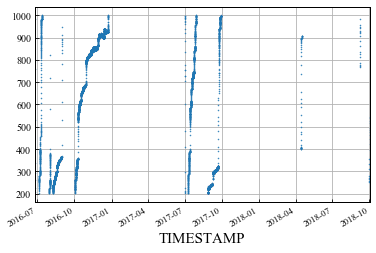

In [155]:
dispgraphs.time_series_graph(df_all, col_name='Load_Avg')

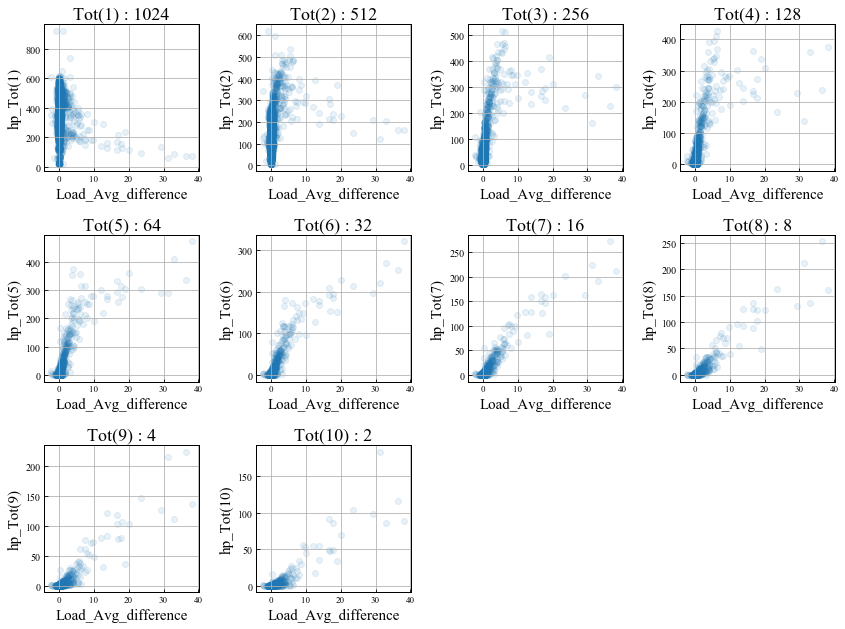

In [12]:
dispgraphs.scatter_graphs(df_all, list_y_names=names_of_center, list_x_names=['Load_Avg_difference']*10
                             ,figsize=(3*4, 3*3), alpha=0.1)

Load_Avg_differenceは0以上でなければいけない→マイナスはエラー、削除

(-1, 1)

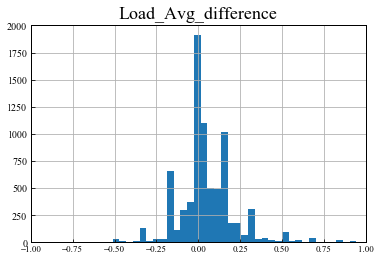

In [13]:
df_all.hist(column='Load_Avg_difference', bins=1000)
plt.xlim(-1,1)

In [14]:
df_all_plus = df_all[df_all['Load_Avg_difference'] >= 0]

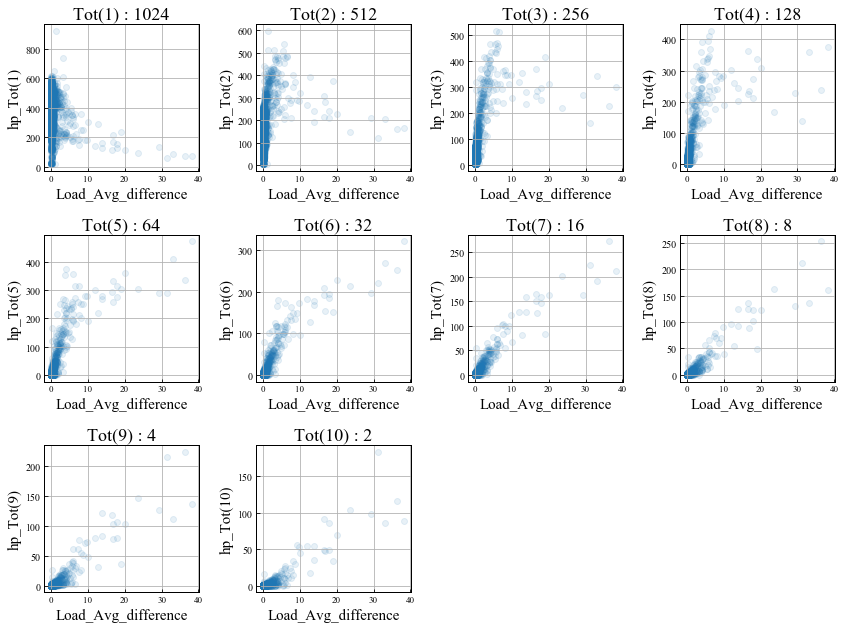

In [15]:
dispgraphs.scatter_graphs(df_all_plus, list_y_names=names_of_center, list_x_names=['Load_Avg_difference']*10
                             ,figsize=(3*4, 3*3), alpha=0.1)

'Load_Avg_difference'== 0のデータが多い。このデータ全て用いて最小化問題を解くと、過学習してしまう恐れがある。

(-1, 1)

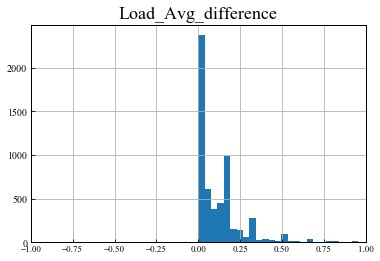

In [16]:
df_all_plus.hist(column='Load_Avg_difference', bins=1000)
plt.xlim(-1,1)

この過学習を防ぐために'Load_Avg_difference'== 0のデータを除外する(流砂量がある時のみを対象にするということ)

In [17]:
df_all_plus_during_events = df_all_plus[df_all_plus['Load_Avg_difference']>0.2]

In [18]:
len(df_all_plus_during_events)

1093

上図から、飽和はLoad_Avg_difference > 0.5で起きていると考えられる(Tot(1)は救いようが無く無視)ので、その時のデータのみを抽出

# 最小化問題を解く

https://org-technology.com/posts/scipy-constrained-minimization-of-multivariate-scalar-functions.html

In [19]:
from scipy.optimize import minimize

# 目的関数(全て)
def func(Const):
    cost = 0
    df_w = df_all_plus[names_of_center].mul(W_IDEAL.reshape(1,10))
    df_w_corrected = df_w.mul(Const[:-1].reshape(1,10))
    df_w_corrected_sum = df_w_corrected.sum(axis=1)
    df_qcalc = df_w_corrected_sum * Const[-1]
#     cost = np.abs(df_qcalc-df_all_plus['Load_Avg_difference'])
    cost = np.sqrt(np.abs(df_qcalc-df_all_plus['Load_Avg_difference']))
#     cost = np.fabs(df_qcalc-df_all_plus['Load_Avg_difference'])
    
    Cost = cost.sum()
    return Cost

def output_result_of_func():
    
    error_less = 0.5
    error_more = 3.0
    
    cons = (
            {'type': 'ineq', 'fun': lambda Const: Const[0]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[0]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[1]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[1]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[2]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[2]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[3]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[3]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[4]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[4]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[5]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[5]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[6]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[6]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[7]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[7]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[8]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[8]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[9]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[9]+error_more},

            {'type': 'ineq', 'fun': lambda Const:  Const[10]-1.0}
        
        
        
           )
    temp = [] 
    W_ans = []
    results = []
    Const0 = np.append(W_IDEAL, 2)# 初期値は適当
    result = minimize(func, x0=Const0, constraints=cons, method="SLSQP")
    
    return result

Correction_factor = output_result_of_func()
Correction_factor.x

array([0.49999999, 0.49999999, 0.5       , 0.5004181 , 2.99999983,
       2.99999983, 2.89524485, 2.92314239, 0.50209477, 2.34811697,
       1.        ])

In [20]:
df_w = df_all_plus[names_of_center].mul(W_IDEAL.reshape(1,10))
df_w_corrected = df_w.mul(Correction_factor.x[:-1].reshape(1,10))
df_w_corrected_sum = df_w_corrected.sum(axis=1)
df_qcalc = df_w_corrected_sum * Correction_factor.x[-1]
cost = df_qcalc-df_all_plus['Load_Avg_difference']
Cost = cost.sum()
Cost

-382.4156414003718

In [21]:
real_W = []
for i in range(10):
    real_W.append(W_IDEAL[i]*Correction_factor.x[i])
print(real_W)

[7.499999794710327e-05, 0.00010999999842183921, 0.00014499999946756675, 0.00032527176381059054, 0.0027299998411616875, 0.005879999657968543, 0.00871468701105738, 0.020198913938291013, 0.00542764444203191, 0.1174058484051474]


In [99]:
from scipy.optimize import minimize

# 目的関数(Tot(５)以上)
names_of_center_over5 = names_of_center[4:]
print(names_of_center_over5)

def func(Const):
    cost = 0
    df_w = df_all_plus_during_events[names_of_center_over5].mul(W_IDEAL[4:].reshape(1,6))
    df_w_corrected = df_w.mul(Const[:-1].reshape(1,6))
    df_w_corrected_sum = df_w_corrected.sum(axis=1)
    df_qcalc = df_w_corrected_sum * Const[-1]
#     cost = np.abs(df_qcalc-df_all_plus['Load_Avg_difference'])
#     cost = np.square(df_qcalc-df_all_plus['Load_Avg_difference'])
    cost = np.sqrt(np.abs(df_qcalc-df_all_plus['Load_Avg_difference']))
#     cost = np.log(np.abs(np.log1p(df_qcalc)-np.log1p(df_all_plus['Load_Avg_difference'])))


    Cost = cost.sum()
    return Cost

def output_result_of_func():
    error_less = 0.5
    error_more = 2.0
    cons = (
            {'type': 'ineq', 'fun': lambda Const: Const[0]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[0]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[1]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[1]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[2]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[2]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[3]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[3]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[4]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[4]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[5]-1},
            {'type': 'ineq', 'fun': lambda Const: -Const[5]+error_more},

            {'type': 'ineq', 'fun': lambda Const:  Const[6]-1.0}
        
        
        
           )
    temp = [] 
    W_ans = []
    results = []
#     Const0 = np.append(W_IDEAL[4:], 2)# 初期値は適当
    Const0 = np.append(np.random.rand(6), 2)# 初期値は適当

    result = minimize(func, x0=Const0, constraints=cons, method="COBYLA")
    
    return result

Correction_factor_tot5to10 = output_result_of_func()

['hp_Tot(5)', 'hp_Tot(6)', 'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)']


In [100]:
Correction_factor_tot5to10

     fun: 589.3643693378101
   maxcv: -0.0
 message: 'Optimization terminated successfully.'
    nfev: 97
  status: 1
 success: True
       x: array([1.88008523, 2.        , 1.72245295, 1.66979134, 1.11681918,
       1.00354423, 2.0980657 ])

In [101]:
Correction_factor_tot5to10.x

array([1.88008523, 2.        , 1.72245295, 1.66979134, 1.11681918,
       1.00354423, 2.0980657 ])

In [102]:
real_W_over5 = []
for i in range(6):
    real_W_over5.append(W_IDEAL[4+i]*Correction_factor_tot5to10.x[i])
print(real_W_over5)

[0.0017108775595316358, 0.00392, 0.005184583390078168, 0.011538258166795379, 0.012072815323429577, 0.05017721152374424]


# Tot（５）以降のみ採用

Tot(４)以前は、飽和や、常時観測されているエラー値(流砂量が無い時でも常にパルスがカウントされている)の対処法がまだ定まっていないので、とりあえず飽和しないTot(5)以降のみを使用して解析を行った

In [103]:
df_qcalc_over5 = df_all_plus[names_of_center_over5].mul(np.array(real_W_over5).reshape(1,6)).sum(axis=1)* Correction_factor_tot5to10.x[-1]

In [105]:
df_qcalc_over5

TIMESTAMP
2016-06-25 02:00:00     2.501599
2016-06-25 02:30:00     4.492202
2016-06-25 03:00:00     5.149537
2016-06-25 03:30:00     6.097051
2016-06-25 04:00:00    20.907733
                         ...    
2018-10-01 04:00:00     5.649516
2018-10-01 04:30:00     2.771543
2018-10-01 05:00:00     1.219144
2018-10-01 05:30:00     0.989037
2018-10-01 06:00:00     1.145368
Length: 5947, dtype: float64

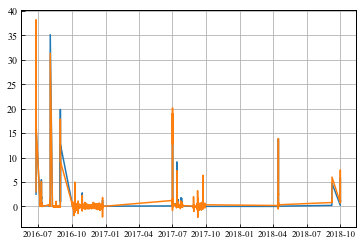

In [106]:
dispgraphs.compare_graphs_time_series(df_qcalc_over5, df_all['Load_Avg_difference'], start='2016-06-25 02:00:00', end='2018-10-01 06:00:00')

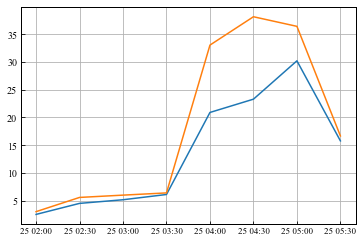

In [107]:
dispgraphs.compare_graphs_time_series(df_qcalc_over5, df_all['Load_Avg_difference'], start='2016-06-25 02:00:00', end='2016-7-01 06:00:00')

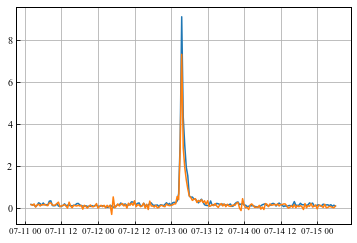

In [108]:
dispgraphs.compare_graphs_time_series(df_qcalc_over5, df_all['Load_Avg_difference'], start='2017-07-11 02:00:00', end='2017-7-15 06:00:00')

2016-06-25 02:00:00
2018-10-01 06:00:00


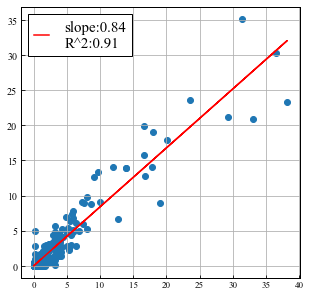

In [109]:
# dispgraphs.compare_graphs_scatter(df_qcalc_over5, df_all['Load_Avg_difference'], start='2016-06-25 02:00:00', end='2016-7-01 06:00:00')
dispgraphs.compare_graphs_scatter(df_all_plus['Load_Avg_difference'], df_qcalc_over5 , linear_regression=True)

# 倍率32倍(チャンネル６)だけで流砂量予測をしたものの精度

In [110]:
just_once_count = 0

In [111]:
df_ch6 = getdfs.get2017cleanedmean_pit_true()

#使うcolumn
if just_once_count == 0:
    cols_ch6 = ['hp_Tot(6)'] + ['Load_Avg', 'Load_Avg_difference']
    just_once_count += 1
    
    print('COL_USE :' +  str(cols_ch6))
    
    df2017_ch6 = getdfs.get2017cleanedmean_pit_true()
    df2017_ch6 = df2017_ch6[cols_ch6]
    
    list_df2018_3events_ch6 = getdfs.get2018_3events_mean()
    for i, df2018_each in enumerate(list_df2018_3events_ch6):
        list_df2018_3events_ch6[i] = df2018_each[cols_ch6]
    
    df_all_ch6 = pd.DataFrame()
    df_all_ch6 = df_all_ch6.append(df2017_ch6)
    del df2017_ch6

    for i, df2018_each in enumerate(list_df2018_3events_ch6):
        df_all_ch6 = df_all_ch6.append(df2018_each)
        
    del list_df2018_3events_ch6
    
    

    
else:
    print('COL_USE :' +  str(cols_use))
    print('Passed')

COL_USE :['hp_Tot(6)', 'Load_Avg', 'Load_Avg_difference']


決定係数は0.89と、それなりに良いが、粒径毎の手法method2と同程度の決定係数である。

2016-06-25 02:00:00
2018-10-01 06:00:00


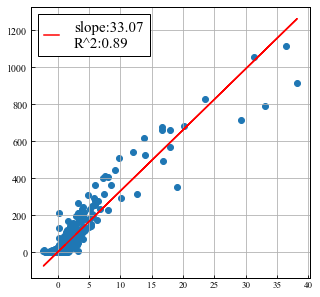

In [112]:
# dispgraphs.compare_graphs_scatter(df_qcalc_over5, df_all['Load_Avg_difference'], start='2016-06-25 02:00:00', end='2016-7-01 06:00:00')
dispgraphs.compare_graphs_scatter(df_all_ch6['Load_Avg_difference'], df_all_ch6['hp_Tot(6)'] , linear_regression=True)

# ふるい結果

下のデータフレームは、ピット内のふるい結果である。上から、表面から-30cm、-45cm、-60cmの位置の土砂である。

In [113]:
df_furui = getdfs.get_furui()

In [114]:
x_furui = [1, 2, 5, 7, 9, 15, 31.5, 50] #furui粒径界の上限
x_tot = [2, 5, 6, 7, 8.5, 10, 12.5, 15, 20, 30, 50] #Tot粒径界の上限
g_furui = ['-1mm(g)', '1-2mm(g)', '2-5mm(g)', '5-7mm(g)', '7-9mm(g)', '9-15mm(g)', '19-31.5mm(g)', '31.5mm-(g)']
percent_furui = ['-1mm(%)', '1-2mm(%)', '2-5mm(%)', '5-7mm(%)', '7-9mm(%)', '9-15mm(%)', '19-31.5mm(%)', '31.5mm-(%)']
df_furui

,31.5mm-(g),19-31.5mm(g),9-15mm(g),7-9mm(g),5-7mm(g),2-5mm(g),1-2mm(g),-1mm(g),31.5mm-(%),19-31.5mm(%),9-15mm(%),7-9mm(%),5-7mm(%),2-5mm(%),1-2mm(%),-1mm(%)
TIMESTAMP,,,,,,,,,,,,,,,,
2017-11-23,134,507,1120,804,1557,2718,2163,3079,1.109088,4.196325,9.269988,6.654527,12.886939,22.496275,17.902665,25.484191
2017-11-23,0,61,423,439,1671,4498,3408,2147,0.000000,0.482328,3.344667,3.471179,13.212620,35.565747,26.947102,16.976358
2017-11-23,0,81,697,1091,2481,4775,2073,1296,0.000000,0.648311,5.578678,8.732191,19.857532,38.218345,16.591964,10.372979
2018-04-28,1172,1713,1690,787,1046,2125,2447,3634,8.019707,11.721637,11.564253,5.385247,7.157520,14.540851,16.744218,24.866566
2018-04-28,901,1223,1678,747,1226,2395,2619,3697,6.219798,8.442634,11.583598,5.156703,8.463344,16.533204,18.079525,25.521193
2018-04-28,1267,1086,1981,823,1174,2340,2386,3213,8.878767,7.610371,13.882270,5.767344,8.227050,16.398038,16.720392,22.515767
2018-07-16,387,551,975,372,530,1269,2048,3800,3.896496,5.547725,9.816754,3.745469,5.336287,12.776883,20.620217,38.260169
2018-07-16,458,678,1240,417,560,974,1211,2502,5.696517,8.432836,15.422886,5.186567,6.965174,12.114428,15.062189,31.119403
2018-07-16,866,854,814,409,591,1249,1491,2556,9.807475,9.671574,9.218573,4.631937,6.693092,14.144960,16.885617,28.946772


左図：ピットふるい3日分×3つの位置(-30cm、-45cm、-60cm)＝9データをプロット。粒度分布百分率  
    右図：ピットの下の方と上の方はあまり1イベントを表しているとは言い難い(底には細かいのが多く、上の方は細かいのが流れて大きな流砂が多いなど)ため、真ん中(-45cm)のデータのみを抽出

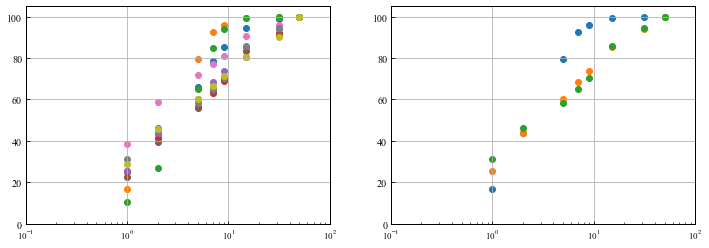

In [115]:
fig = plt.figure(figsize=(12,4))
ax1 = plt.subplot(1,2,1) 

for i in range(9):
    furui_percent_cumsum = np.cumsum(df_furui[i:i+1][percent_furui], axis=1)
    ax1.scatter(x_furui, furui_percent_cumsum)
    ax1.set_xscale('log')
    ax1.set_ylim(0,105)
    ax1.set_xlim((0.1), 100)

ax2 = plt.subplot(1,2,2) 
for i in range(1, 9, 3):
    furui_percent_cumsum = np.cumsum(df_furui[i:i+1][percent_furui], axis=1)
    ax2.scatter(x_furui, furui_percent_cumsum)
    ax2.set_xscale('log')
    ax2.set_ylim(0,105)
    ax2.set_xlim((0.1), 100)

## 9/21(大粒径流砂が少ないイベント)に注目

In [116]:
# args = {df = df_all_ch6
#         start = '2017-09-21 00:00:00'
#         end = '2017-09-23 00:00:00'
#         real_W = real_W_over5
#         Correction_factor = Correction_factor_tot5to10.x[-1]
#         percents_init = 95
#         diameter_init = 9   
    
# }

In [117]:
start_921 = '2017-09-21 00:00:00'
# end_921 = df_2017_dia_mean_dropped_weigh.index[-1]
end_921 = '2017-09-23 00:00:00'
# end_921 = '2017-10-01 00:00:00'

In [118]:
qcalc_each = df_all_plus[names_of_center_over5][start_921:end_921].mul(np.array(real_W_over5).reshape(1,6)) * Correction_factor_tot5to10.x[-1]

In [119]:
qcalc_each.head()

,hp_Tot(5),hp_Tot(6),hp_Tot(7),hp_Tot(8),hp_Tot(9),hp_Tot(10)
TIMESTAMP,,,,,,
2017-09-21 00:30:00,0.000000,0.000997,0.001318,0.0,0.0,0.0
2017-09-21 01:30:00,0.002175,0.000997,0.000000,0.0,0.0,0.0
2017-09-21 02:30:00,0.001740,0.001994,0.000000,0.0,0.0,0.0
2017-09-21 03:30:00,0.003046,0.000997,0.000000,0.0,0.0,0.0
2017-09-21 04:30:00,0.001305,0.000997,0.000000,0.0,0.0,0.0


In [120]:
qcalc_each.sum()

hp_Tot(5)     12.877506
hp_Tot(6)     11.538110
hp_Tot(7)      5.513953
hp_Tot(8)      3.961313
hp_Tot(9)      1.197397
hp_Tot(10)     0.395579
dtype: float64

In [121]:
percents = [95]
percents.extend(list(qcalc_each.sum()/qcalc_each.sum().sum()*(100-95)))
print(percents)

[95, 1.8145583089573916, 1.6258252006663556, 0.7769663292271122, 0.5581852117992724, 0.16872423598042746, 0.05574071336943994]


In [122]:
real_W_over5

[0.0017108775595316358,
 0.00392,
 0.005184583390078168,
 0.011538258166795379,
 0.012072815323429577,
 0.05017721152374424]

In [123]:
def calc_diameter(x):
    r = ((3*x*1000)/(4*2.6*math.pi))**(1/3)*10
    diameter = 2*r
    return diameter

diameters = [9]
for x in real_W_over5:
    diameters.append(calc_diameter(x))
    

In [124]:
diameters

[9,
 10.791512544289613,
 14.226717208599277,
 15.616389455953525,
 20.388694908516793,
 20.698817195036735,
 33.279606625997474]

In [125]:
list(qcalc_each.sum())

[12.877505887732534,
 11.538110123358148,
 5.513952585486748,
 3.961312962998946,
 1.197397367456075,
 0.39557911203956214]

In [126]:
furui_percent_cumsum = np.cumsum(percents)
furui_percent_cumsum

array([ 95.        ,  96.81455831,  98.44038351,  99.21734984,
        99.77553505,  99.94425929, 100.        ])

In [127]:
x_furui

[1, 2, 5, 7, 9, 15, 31.5, 50]

In [128]:
x_furui = [1, 2, 5, 7, 9, 15, 31.5, 50] #furui粒径界の上限
x_tot = [2, 5, 6, 7, 8.5, 10, 12.5, 15, 20, 30, 50] #Tot粒径界の上限
g_furui = ['-1mm(g)', '1-2mm(g)', '2-5mm(g)', '5-7mm(g)', '7-9mm(g)', '9-15mm(g)', '19-31.5mm(g)', '31.5mm-(g)']
percent_furui = ['-1mm(%)', '1-2mm(%)', '2-5mm(%)', '5-7mm(%)', '7-9mm(%)', '9-15mm(%)', '19-31.5mm(%)', '31.5mm-(%)']


In [129]:
x_tot[-7:]

[8.5, 10, 12.5, 15, 20, 30, 50]

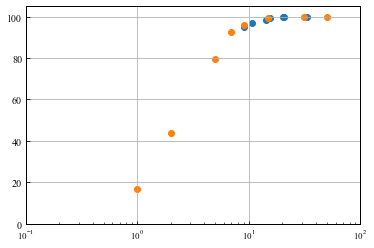

In [130]:
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(1,1,1) 

furui_percent_cumsum = np.cumsum(percents)
ax.scatter(diameters, furui_percent_cumsum)
# ax.scatter(x_tot[-7:], furui_percent_cumsum)

ax.set_xscale('log')
ax.set_ylim(0,105)
ax.set_xlim((0.1), 100)


furui_percent_cumsum = np.cumsum(df_furui[1:2][percent_furui], axis=1)
ax.scatter(x_furui, furui_percent_cumsum)


ハイドロフォンで測れた流砂量の割合が低いため、その分流砂量を過小評価してしまっている(Cは一定値にしているため)

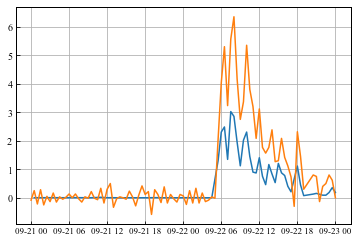

In [147]:
dispgraphs.compare_graphs_time_series(df_qcalc_over5, df_all['Load_Avg_difference'], start=start_921, end=end_921)

## 7月16日（ふるい日）

In [131]:
start_415 = '2018-04-15 0:00'
end_415 = '2018-04-28 0:00'

In [132]:
qcalc_each = df_all_plus[names_of_center_over5][start_415:end_415].mul(np.array(real_W_over5).reshape(1,6)) * Correction_factor_tot5to10.x[-1]

In [133]:
qcalc_each.sum()

hp_Tot(5)      8.832863
hp_Tot(6)     10.399651
hp_Tot(7)      9.369237
hp_Tot(8)     14.604040
hp_Tot(9)     13.754718
hp_Tot(10)    20.646678
dtype: float64

In [134]:
percents = [73]
percents.extend(list(qcalc_each.sum()/qcalc_each.sum().sum()*(100-73)))
print(percents)

[73, 3.0730053476227615, 3.6181002845840227, 3.2596128570593113, 5.080832147058868, 4.785348001471395, 7.183101362203643]


In [135]:
real_W_over5

[0.0017108775595316358,
 0.00392,
 0.005184583390078168,
 0.011538258166795379,
 0.012072815323429577,
 0.05017721152374424]

In [136]:
def calc_diameter(x):
    r = ((3*x*1000)/(4*2.6*math.pi))**(1/3)*10
    diameter = 2*r
    return diameter

diameters = [9]
for x in real_W_over5:
    diameters.append(calc_diameter(x))
    

In [137]:
diameters

[9,
 10.791512544289613,
 14.226717208599277,
 15.616389455953525,
 20.388694908516793,
 20.698817195036735,
 33.279606625997474]

In [138]:
furui_percent_cumsum = np.cumsum(percents)
furui_percent_cumsum

array([ 73.        ,  76.07300535,  79.69110563,  82.95071849,
        88.03155064,  92.81689864, 100.        ])

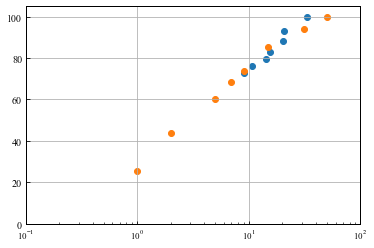

In [139]:
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(1,1,1) 

furui_percent_cumsum = np.cumsum(percents)
ax.scatter(diameters, furui_percent_cumsum)
# ax.scatter(x_tot[-7:], furui_percent_cumsum)

ax.set_xscale('log')
ax.set_ylim(0,105)
ax.set_xlim((0.1), 100)


furui_percent_cumsum = np.cumsum(df_furui[4:5][percent_furui], axis=1)
ax.scatter(x_furui, furui_percent_cumsum)

ハイドロフォンで測れた流砂量の割合平均値に近いためか、流砂量を精度よく算出できている

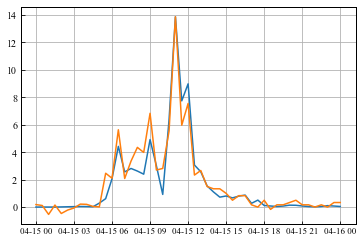

In [148]:
dispgraphs.compare_graphs_time_series(df_qcalc_over5, df_all['Load_Avg_difference'], start=start_415, end=end_415)

# 流砂量を求める

In [140]:
def qcalc(df, list_weight, list_beta, C):
    df_weight = df.mul(list_weight.reshape(1,len(list_weight)))
    df_weight_corrected = df_w.mul(list_beta.reshape(1,6))
    df_w_corrected_sum = df_weight_corrected.sum(axis=1)*C
    
    return df_w_corrected_sum

In [141]:
col_5to10 = names_of_center[4:]
print(col_5to10)

['hp_Tot(5)', 'hp_Tot(6)', 'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)']


In [142]:
df_weight = qcalc(df_all[col_5to10], list_weight=W_IDEAL[4:], 
                     list_beta=Correction_factor_tot5to10.x[:-1], C=Correction_factor_tot5to10.x[-1])

ValueError: Unable to coerce to DataFrame, shape must be (5947, 10): given (1, 6)

In [ ]:
df_weight.plot()

# 飽和を分ける

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user\OneDrive - Kyoto University\shared-Yutaka\Research\Hydrophone\my_module\getdfs.py:490: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

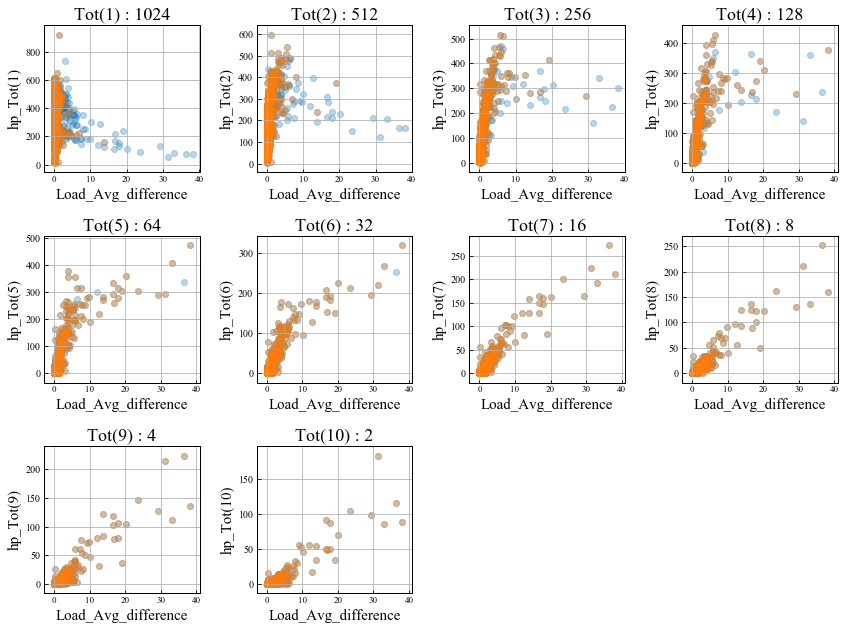

In [150]:
df_true = getdfs.get_nosaturated_df(df_all_plus)

In [151]:
df_true.isnull().sum(axis=1)

TIMESTAMP
2016-06-25 02:00:00    0
2016-06-25 02:30:00    1
2016-06-25 03:00:00    5
2016-06-25 03:30:00    1
2016-06-25 04:00:00    4
                      ..
2018-10-01 04:00:00    0
2018-10-01 04:30:00    1
2018-10-01 05:00:00    0
2018-10-01 05:30:00    0
2018-10-01 06:00:00    0
Length: 5947, dtype: int64

In [152]:
df_true_1to10 = df_true[df_true.isnull().sum(axis=1) == 0]
print(len(df_true_1to10))
df_true_2to10 = df_true[df_true.isnull().sum(axis=1) == 1]
print(len(df_true_2to10))
df_true_3to10 = df_true[df_true.isnull().sum(axis=1) == 2]
print(len(df_true_3to10))
df_true_4to10 = df_true[df_true.isnull().sum(axis=1) == 3]
print(len(df_true_4to10))
df_true_5to10 = df_true[df_true.isnull().sum(axis=1) == 4]
print(len(df_true_5to10))
df_true_6to10 = df_true[df_true.isnull().sum(axis=1) == 5]
print(len(df_true_6to10))
df_true_7to10 = df_true[df_true.isnull().sum(axis=1) == 6]
print(len(df_true_7to10))
df_true_8to10 = df_true[df_true.isnull().sum(axis=1) == 7]
print(len(df_true_8to10))

4235
756
404
207
150
129
66
0


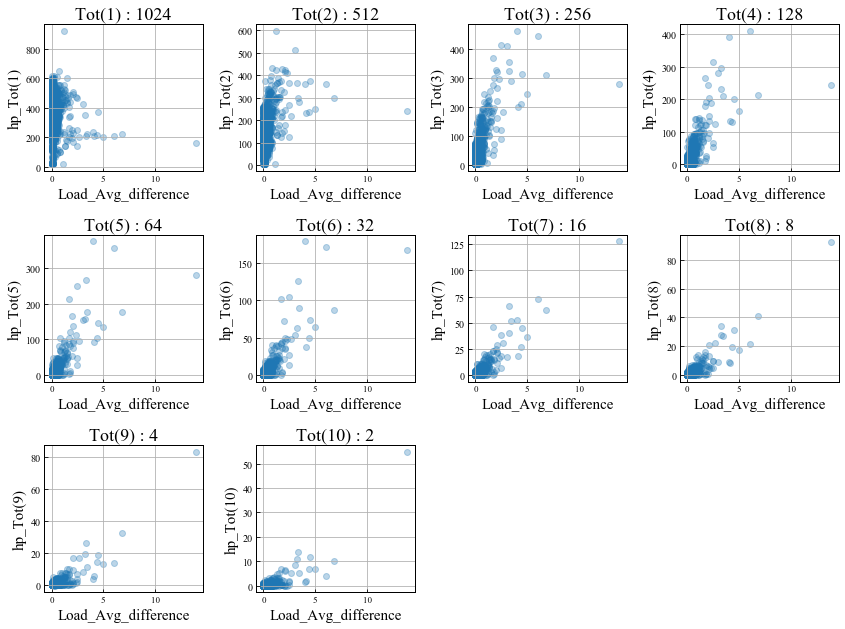

In [153]:
axes = dispgraphs.scatter_graphs(df_true_1to10, list_y_names=names_of_center, list_x_names=['Load_Avg_difference']*10
                             ,figsize=(3*4, 3*3), alpha=0.3)
# dispgraphs.scatter_graphs(df_true_2to10, list_y_names=names_of_center, 
#                           list_x_names=['Load_Avg_difference']*10, figsize=(3*4, 3*3),
#                           overlap=True, axes=axes, alpha=0.3)
# dispgraphs.scatter_graphs(df_true_3to10, list_y_names=names_of_center, 
#                           list_x_names=['Load_Avg_difference']*10, figsize=(3*4, 3*3),
#                           overlap=True, axes=axes, alpha=0.3)
# dispgraphs.scatter_graphs(df_true_4to10, list_y_names=names_of_center, 
#                           list_x_names=['Load_Avg_difference']*10, figsize=(3*4, 3*3),
#                           overlap=True, axes=axes, alpha=0.3)
# dispgraphs.scatter_graphs(df_true_5to10, list_y_names=names_of_center, 
#                           list_x_names=['Load_Avg_difference']*10, figsize=(3*4, 3*3),
#                           overlap=True, axes=axes, alpha=0.3)
# dispgraphs.scatter_graphs(df_true_6to10, list_y_names=names_of_center, 
#                           list_x_names=['Load_Avg_difference']*10, figsize=(3*4, 3*3),
#                           overlap=True, axes=axes, alpha=0.3)
# dispgraphs.scatter_graphs(df_true_7to10, list_y_names=names_of_center, 
#                           list_x_names=['Load_Avg_difference']*10, figsize=(3*4, 3*3),
#                           overlap=True, axes=axes, alpha=0.3)

# 使用メモリ確認